# Connects to a database

#Create Database

In [3]:
import sqlite3

conn = sqlite3.connect("my_database.db")
cursor = conn.cursor()

# Create customers table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS customers (
        customer_id INTEGER PRIMARY KEY,
        first_name TEXT,
        last_name TEXT,
        email TEXT,
        phone TEXT
    )
''')

# Create orders table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS orders (
        order_id INTEGER PRIMARY KEY,
        customer_id INTEGER,
        order_date DATE,
        total_amount REAL
    )
''')

# Insert data into customers and orders tables
cursor.executemany("INSERT INTO customers (first_name, last_name, email, phone) VALUES (?, ?, ?, ?)", [
    ('John', 'Doe', 'john@example.com', '123-456-7890'),
    ('Jane', 'Smith', 'jane@example.com', '987-654-3210')
])

cursor.executemany("INSERT INTO orders (customer_id, order_date, total_amount) VALUES (?, ?, ?)", [
    (1, '2023-11-01', 100.00),
    (2, '2023-11-02', 150.00)
])

conn.commit()
conn.close()


#Retrieve and Visualize Data:

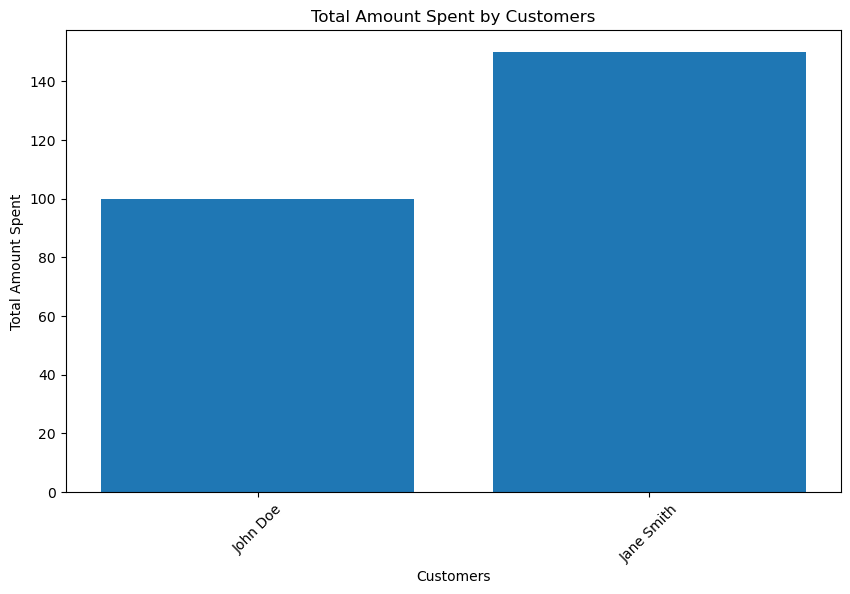

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect("my_database.db")

# Retrieve data with a SQL query
query = '''
    SELECT customers.first_name, customers.last_name, SUM(orders.total_amount) AS total_spent
    FROM customers
    LEFT JOIN orders ON customers.customer_id = orders.customer_id
    GROUP BY customers.customer_id
'''

df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Visualize the data using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['first_name'] + ' ' + df['last_name'], df['total_spent'])
plt.xlabel("Customers")
plt.ylabel("Total Amount Spent")
plt.title("Total Amount Spent by Customers")
plt.xticks(rotation=45)
plt.show()


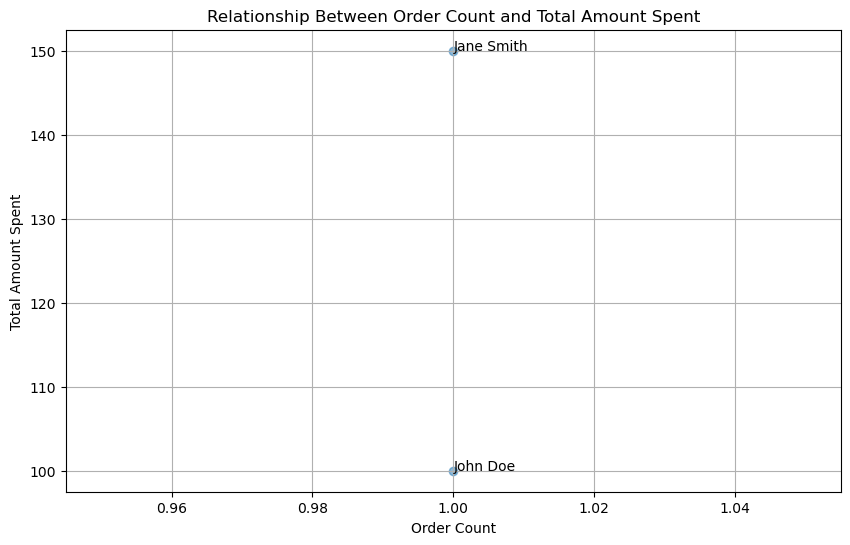

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect("my_database.db")

# Retrieve data with a SQL query
query = '''
    SELECT customers.first_name, customers.last_name, 
           COUNT(orders.order_id) AS order_count, 
           SUM(orders.total_amount) AS total_spent
    FROM customers
    LEFT JOIN orders ON customers.customer_id = orders.customer_id
    GROUP BY customers.customer_id
'''

df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Create a scatter plot to visualize the relationship between order count and total spent
plt.figure(figsize=(10, 6))
plt.scatter(df['order_count'], df['total_spent'], alpha=0.5)
plt.xlabel("Order Count")
plt.ylabel("Total Amount Spent")
plt.title("Relationship Between Order Count and Total Amount Spent")
plt.grid()

# Annotate the data points with customer names
for i, row in df.iterrows():
    plt.annotate(f"{row['first_name']} {row['last_name']}", (row['order_count'], row['total_spent']))

plt.show()
